# Evaluation of the participant questionnaire
## Data management

In [1]:
#Import Statements
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import chardet

sns.set() # Setting seaborn as default style
sns.set_theme()

# declare global helpers
condition_values = ['0ms','10ms','400ms','10ms echo','400ms echo']
groupnames = [0,1,2,3,4]
browsernames = ["MSIE", "Firefox", "Safari", "Chrome", "Opera"]

In [2]:
# 1. Time results were received.
# 2. MD5 hash of participant's IP address.
# 3. Controller name.
# 4. Item number.
# 5. Element number.
# 6. Type.
# 7. Group.
# 8. PennElementType.
# 9. PennElementName.
# 10. Parameter.
# 11. Value.
# 12. EventTime.
# 13. Comments.
df = pd.read_csv('results_audiovisual_exp.txt',
                 sep = ',',
                 comment='#', 
                 header=None,
                 names = ['time','hash', 'controller','item','element', 'type', 'group','petype','pename','parameter', 'value', 'event_time', 'comments'],
                engine = 'python')

In [3]:
df.info()
print([*df])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        957 non-null    int64  
 1   hash        957 non-null    object 
 2   controller  957 non-null    object 
 3   item        957 non-null    int64  
 4   element     957 non-null    int64  
 5   type        957 non-null    object 
 6   group       0 non-null      float64
 7   petype      957 non-null    object 
 8   pename      957 non-null    object 
 9   parameter   948 non-null    object 
 10  value       878 non-null    object 
 11  event_time  948 non-null    float64
 12  comments    464 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 97.3+ KB
['time', 'hash', 'controller', 'item', 'element', 'type', 'group', 'petype', 'pename', 'parameter', 'value', 'event_time', 'comments']


In [4]:
df.describe()

,time,item,element,group,event_time
count,9.570000e+02,957.000000,957.0,0.0,9.480000e+02
mean,1.617953e+09,2.824451,0.0,NaN,1.617999e+12
std,1.164693e+06,0.837477,0.0,NaN,1.068571e+09
min,1.613062e+09,1.000000,0.0,NaN,1.614078e+12
25%,1.617908e+09,3.000000,0.0,NaN,1.617908e+12
50%,1.618162e+09,3.000000,0.0,NaN,1.618162e+12
75%,1.618517e+09,3.000000,0.0,NaN,1.618517e+12
max,1.619106e+09,4.000000,0.0,NaN,1.619106e+12


In [5]:
df.tail(50)

,time,hash,controller,item,element,type,group,petype,pename,parameter,value,event_time,comments
907,1618912771,d0814e2e5ea90547f53f979d7e213e11,PennController,4,0,audio_volume,NaN,PennController,3,_Trial_,Start,1.618913e+12,NaN
908,1618912771,d0814e2e5ea90547f53f979d7e213e11,PennController,4,0,audio_volume,NaN,Scale,answer1,Choice,Ja,1.618913e+12,NaN
909,1618912771,d0814e2e5ea90547f53f979d7e213e11,PennController,4,0,audio_volume,NaN,Scale,answer2,Choice,Ja,1.618913e+12,NaN
910,1618912771,d0814e2e5ea90547f53f979d7e213e11,PennController,4,0,audio_volume,NaN,PennController,3,_Trial_,End,1.618913e+12,NaN
911,1619094000,e184a2fe58d7e6de9ca77f14bd6871ad,PennController,1,0,intro1,NaN,PennController,0,_Trial_,Start,1.619092e+12,NaN
912,1619094000,e184a2fe58d7e6de9ca77f14bd6871ad,PennController,1,0,intro1,NaN,PennController,0,_Trial_,End,1.619094e+12,NaN
913,1619094000,e184a2fe58d7e6de9ca77f14bd6871ad,PennController,2,0,intro2,NaN,PennController,1,_Trial_,Start,1.619094e+12,NaN
914,1619094000,e184a2fe58d7e6de9ca77f14bd6871ad,PennController,2,0,intro2,NaN,Html,consent,consent,checked,1.619094e+12,checkbox
915,1619094000,e184a2fe58d7e6de9ca77f14bd6871ad,PennController,2,0,intro2,NaN,PennController,1,_Trial_,End,1.619094e+12,NaN
916,1619094000,e184a2fe58d7e6de9ca77f14bd6871ad,PennController,3,0,personal,NaN,PennController,2,_Trial_,Start,1.619094e+12,NaN


## Gender

Text(0.5, 1.0, 'Distribution of gender')

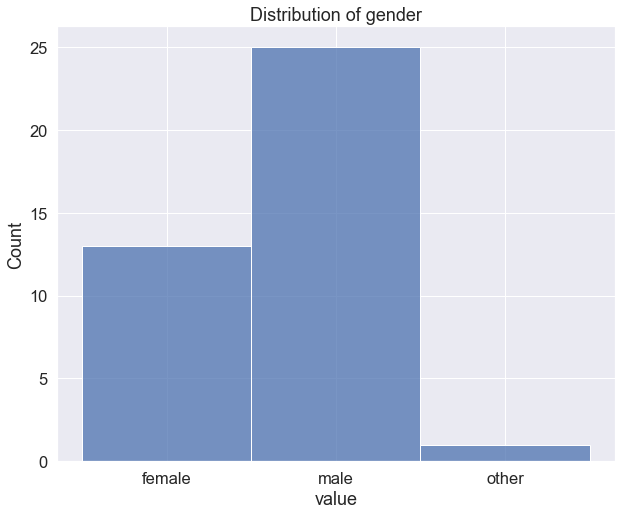

In [6]:
#display all the genders
list(df[df['parameter'] == 'gender']['value'])
fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.set(font_scale=1.5)

ax = sns.histplot(data = df[df['parameter'] == 'gender'],x = 'value')
plt.title('Distribution of gender')

['24', '24', '24', '24', '23', '38']


Text(0.5, 1.0, 'Distribution of age')

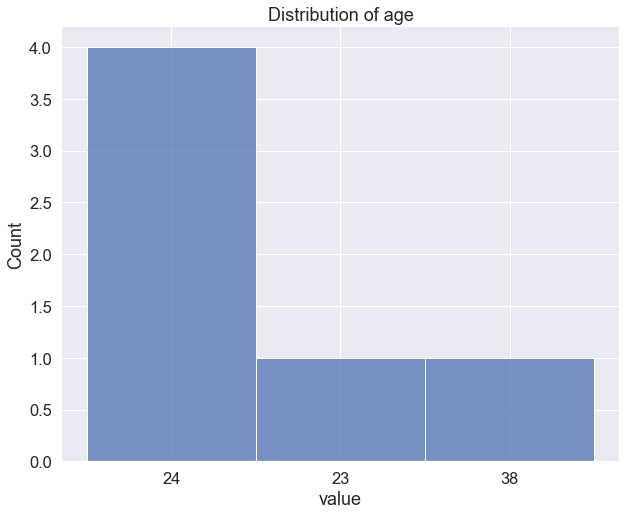

In [12]:
#display all the ages
print(list(df[df['parameter'] == 'age']['value']))
fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.set(font_scale=1.5)

ax = sns.histplot(data = df[df['parameter'] == 'age'],x = 'value')
plt.title('Distribution of age')

## Comments

In [7]:
#display all the comments
list(df[df['parameter'] == 'comment']['value'].dropna())

['test',
 'go Aron-Schmaron!',
 'als Kind häufig Mittelohrentzündungen gehabt und nur knapp Paukenröhrchen entkommen%2C wahrscheinlich nicht diagnostiziertes eingeschränktes Hörvermögen...',
 'test2',
 'test']

Text(0.5, 1.0, 'Distribution of handedness')

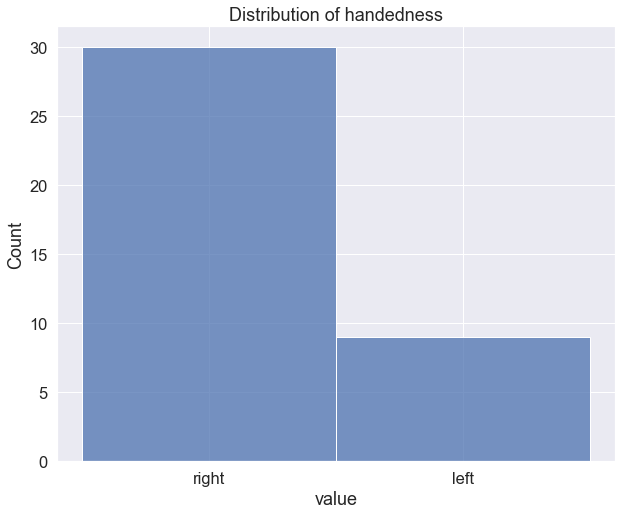

In [8]:
fig = plt.gcf()
fig.set_size_inches(10, 8)
sns.set(font_scale=1.5)

ax = sns.histplot(data = df[df['parameter'] == 'handedness'],x = 'value')
plt.title('Distribution of handedness')

## Participants to exclude

In [9]:
#Messages of people who answered psych
dfp =df.loc[(df['parameter'] == 'psych') & (df['value'] != 'no')]
dfp['value'].dropna()

109    tese
784    test
805    test
Name: value, dtype: object

In [10]:
#Messages of people who answered asd
dfp =df.loc[(df['parameter'] == 'asd') & (df['value'] != 'no')]
dfp['value']

793    yes
814    yes
Name: value, dtype: object